# Waveform amplitude stability

In [ ]:
import matplotlib.pyplot as plt
import subjects
import numpy as np
from scipy import stats
sessions = subjects.sd.ratSday3

In [ ]:
for sub, sess in enumerate(sessions):

    rec_duration = sess.eegfile.duration
    t_bin = np.arange(0, rec_duration, 2 * 3600)
    spktrns = sess.neurons.spiketrains
    wav_amps = sess.neurons.waveforms_amplitude

    mean_wav_amp = []
    for spk, amp in zip(spktrns, wav_amps):
        mean_wav_amp.append(
            stats.binned_statistic(spk, amp, bins=t_bin, statistic="mean")[0]
        )
    mean_wav_amp = np.asarray(mean_wav_amp)


In [ ]:
%matplotlib widget

plt.plot(mean_wav_amp.T)

# Stability viewer from phyio

In [2]:
import subjects
import numpy as np
from scipy import stats

sess = subjects.sd.ratSday3[0]

In [3]:
neurons = sess.neurons_iso
metrics = neurons.metadata['stability_metrics']

In [ ]:
metrics

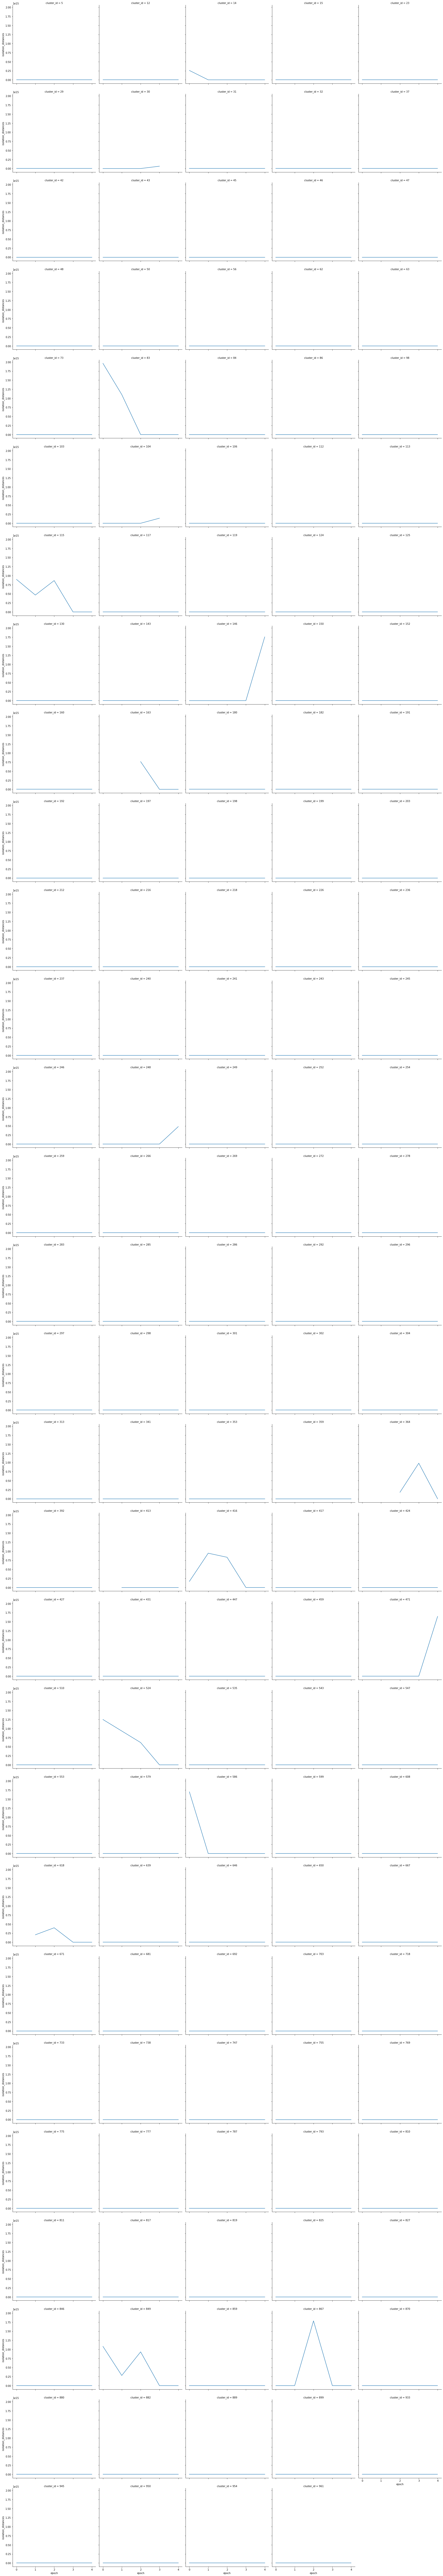

In [4]:
import seaborn as sns
metrics = metrics.reset_index(drop=True)
sns.relplot(
    data=metrics,
    x="epoch",
    y="isolation_distances",
    kind="line",
    col="cluster_id",
    col_wrap=5,
)
